In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
net=pd.read_csv("Netflix Userbase.csv")
net.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [3]:
net.tail()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month
2499,2500,Basic,15,13-08-22,12-07-23,United States,35,Female,Smart TV,1 Month


In [4]:
net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [5]:
net.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


In [6]:
s_t=pd.get_dummies(net['Subscription Type'],drop_first=True)
genders=pd.get_dummies(net['Gender'],drop_first=True)
countrys=pd.get_dummies(net['Country'],drop_first=True)


In [7]:
net.drop(['Subscription Type','Country','Gender'],axis=1,inplace=True)

In [8]:
net.head()

,User ID,Monthly Revenue,Join Date,Last Payment Date,Age,Device,Plan Duration
0,1,10,15-01-22,10-06-23,28,Smartphone,1 Month
1,2,15,05-09-21,22-06-23,35,Tablet,1 Month
2,3,12,28-02-23,27-06-23,42,Smart TV,1 Month
3,4,12,10-07-22,26-06-23,51,Laptop,1 Month
4,5,10,01-05-23,28-06-23,33,Smartphone,1 Month


In [9]:
net=pd.concat([net,s_t,genders,countrys],axis=1)
net.head()

,User ID,Monthly Revenue,Join Date,Last Payment Date,Age,Device,Plan Duration,Premium,Standard,Male,Brazil,Canada,France,Germany,Italy,Mexico,Spain,United Kingdom,United States
0,1,10,15-01-22,10-06-23,28,Smartphone,1 Month,0,0,1,0,0,0,0,0,0,0,0,1
1,2,15,05-09-21,22-06-23,35,Tablet,1 Month,1,0,0,0,1,0,0,0,0,0,0,0
2,3,12,28-02-23,27-06-23,42,Smart TV,1 Month,0,1,1,0,0,0,0,0,0,0,1,0
3,4,12,10-07-22,26-06-23,51,Laptop,1 Month,0,1,0,0,0,0,0,0,0,0,0,0
4,5,10,01-05-23,28-06-23,33,Smartphone,1 Month,0,0,1,0,0,0,1,0,0,0,0,0


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
net.columns

Index(['User ID', 'Monthly Revenue', 'Join Date', 'Last Payment Date', 'Age',
       'Device', 'Plan Duration', 'Premium', 'Standard', 'Male', 'Brazil',
       'Canada', 'France', 'Germany', 'Italy', 'Mexico', 'Spain',
       'United Kingdom', 'United States'],
      dtype='object')

In [17]:
X=net[['User ID', 'Monthly Revenue', 'Premium', 'Standard', 'Male', 'Brazil',
       'Canada', 'France', 'Germany', 'Italy', 'Mexico', 'Spain',
       'United Kingdom', 'United States']]
y=net[ 'Age']

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.40,random_state=101)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lm=LinearRegression()

In [21]:
lm.fit(X_train,y_train)

LinearRegression()

In [22]:
print(lm.intercept_)

39.44129975947873


In [23]:
print(lm.coef_)

[-4.55256796e-05 -6.48085370e-02 -4.25996915e-01  3.50509448e-01
 -3.62585875e-01 -5.75456245e-01  7.98532934e-01  6.99475050e-01
 -2.17597817e-01  4.59948367e-01  3.59565250e-02  5.94835595e-01
  1.36729220e+00  2.27737671e-01]


In [24]:
predictions=lm.predict(X_test)

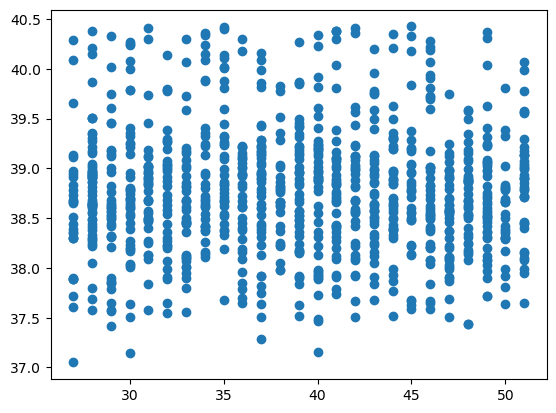

In [25]:
plt.scatter(y_test,predictions)

C:\Users\palan\AppData\Local\Temp\ipykernel_1752\1061164399.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50)


<Axes: xlabel='Age', ylabel='Density'>

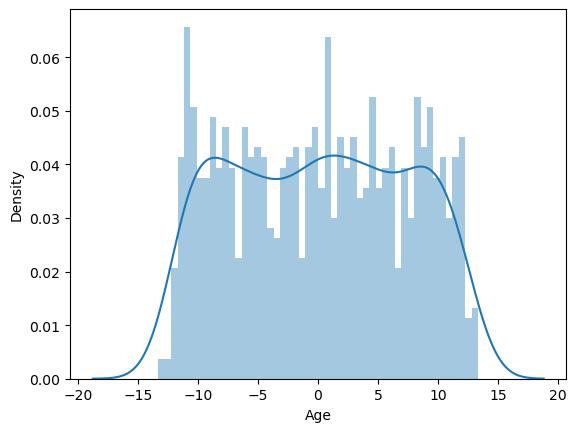

In [26]:
sns.distplot((y_test-predictions),bins=50)

In [27]:
predictions

array([38.33488246, 38.82246587, 38.907723  , 39.04641591, 38.36958191,
       37.50895858, 37.42109402, 39.69620504, 37.95396881, 39.07542722,
       40.06452634, 38.90546132, 40.37170199, 37.58014071, 38.0819823 ,
       39.32662372, 38.30438431, 38.52407667, 40.24361276, 39.09252266,
       38.83602006, 38.96346265, 38.52894792, 38.73091438, 38.27540931,
       38.36200462, 38.07842407, 37.90667747, 38.00471975, 37.63966133,
       38.62383251, 38.95227413, 38.99221251, 40.35888925, 38.21516318,
       38.88784534, 38.81212749, 39.72960086, 38.42411279, 37.66810179,
       38.49230421, 38.67515311, 39.49839418, 38.4063266 , 39.22868461,
       38.65094181, 38.67926211, 39.06976903, 39.32807554, 38.39104517,
       38.41704912, 39.56294139, 39.41713684, 38.56298989, 38.79932759,
       37.78884135, 39.00957093, 39.22039133, 38.19461142, 38.94773465,
       38.58037487, 37.95649389, 39.83873138, 39.35062574, 38.29430247,
       38.94086812, 39.77735945, 38.27107954, 38.67932767, 38.90

In [32]:
print(lm.fit_intercept)

True


In [34]:
print(lm.get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


In [35]:
from sklearn  import metrics

In [36]:
print('MAE',metrics.mean_absolute_error(y_test,predictions))
print('MSE',metrics.mean_squared_error(y_test,predictions))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE 6.283295704670201
MSE 52.75242692836179
RMSE 7.263086597883974


In [37]:
print(lm.coef_)

[-4.55256796e-05 -6.48085370e-02 -4.25996915e-01  3.50509448e-01
 -3.62585875e-01 -5.75456245e-01  7.98532934e-01  6.99475050e-01
 -2.17597817e-01  4.59948367e-01  3.59565250e-02  5.94835595e-01
  1.36729220e+00  2.27737671e-01]
